In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [12]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
x=data.drop(columns=['Exited'])
y=data['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.fit_transform(x_test)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=5
)

In [20]:
history= model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,batch_size=32,callbacks=callback)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6445 - loss: 0.6411 - val_accuracy: 0.7975 - val_loss: 0.4703
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4553 - val_accuracy: 0.8037 - val_loss: 0.4354
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.4354 - val_accuracy: 0.8075 - val_loss: 0.4237
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8108 - loss: 0.4225 - val_accuracy: 0.8219 - val_loss: 0.4108
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8260 - loss: 0.4004 - val_accuracy: 0.8263 - val_loss: 0.3972
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8320 - loss: 0.3917 - val_accuracy: 0.8331 - val_loss: 0.3833
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8422 - loss: 0.3798 - val_accuracy: 0.8381 - val_loss: 0.3717
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8514 - loss: 0.3635 - val_accuracy: 0.

In [21]:
model.layers[0].get_weights()

[array([[ 9.10822079e-02,  8.01843330e-02,  3.30516577e-01,
          5.70732057e-01, -1.03893019e-01, -2.60581553e-01,
         -2.66484963e-03, -6.66240975e-02,  4.24153328e-01,
         -2.95164347e-01,  1.19176611e-01],
        [ 1.18596479e-01, -6.57696724e-01,  5.01432419e-01,
         -5.34681529e-02,  5.13621569e-01,  4.86906290e-01,
         -7.26833165e-01,  8.91996473e-02, -3.27652603e-01,
          2.44213387e-01,  2.71017253e-01],
        [ 4.74080034e-02,  2.63980143e-02,  1.56274796e-01,
          6.46015480e-02,  2.02582940e-01, -2.63275504e-01,
         -3.23821814e-03, -4.36908007e-01, -5.46022430e-02,
          3.72316875e-02, -3.99008095e-02],
        [-1.46446392e-01,  2.43366987e-01,  3.89929950e-01,
          4.31742191e-01, -1.84120029e-01, -4.08787966e-01,
         -8.88128132e-02,  5.44076145e-01, -5.07277608e-01,
         -5.69011390e-01,  5.97617567e-01],
        [-1.21340573e+00,  6.32254332e-02, -2.87734956e-01,
          1.73251122e-01,  7.54098952e-01,  

In [22]:
model.layers[1].get_weights()

[array([[ 0.45152116,  0.04888308, -0.49429247, -0.23534736,  0.73867077,
          0.17137828,  0.1212706 , -0.4000664 ,  0.3664064 , -0.28862086,
          0.14866991],
        [-0.32273555,  0.2765261 ,  0.4290753 ,  0.27143952, -0.3330536 ,
         -0.7679355 , -0.3459689 , -0.11869316, -0.37288743,  0.17030668,
         -0.06540933],
        [ 0.32583928,  0.05820013, -0.05440503,  0.5525034 , -0.16904497,
         -0.17716004,  0.18981187,  0.5428505 ,  0.26773825,  0.1354409 ,
         -0.57629436],
        [-0.19419277, -0.27989733,  0.40958396,  0.08612005,  0.02543293,
          0.3695901 , -0.1778797 , -0.47923636, -0.11876357, -0.41920486,
          0.06290451],
        [ 0.40267617,  0.38779435, -0.21198486,  0.05366112,  0.09748221,
         -0.66679674, -0.05044572,  0.6853695 , -0.6806102 ,  0.67807   ,
          0.6973158 ],
        [ 0.2935025 ,  0.54282933, -0.11100745,  0.2089968 ,  0.05744417,
          0.07479898, -0.6587371 ,  0.3870398 , -0.07031918,  0.0761048

In [23]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [24]:
y_pred=np.where(y_log>0.5,1,0)

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.8625


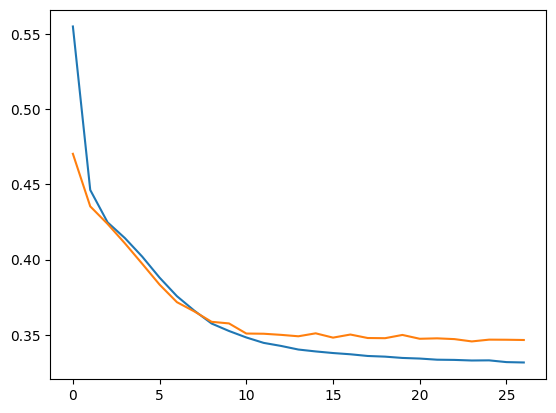

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [27]:
model.save('churn_model.h5')

In [28]:
import joblib
joblib.dump(scale, 'scaler.joblib')


['scaler.joblib']